# Week 1 Demo Notebook (Generated Dataset)

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

import numpy as np

#change sklearn.cross_validation to sklearn.model_selection
from sklearn.model_selection import train_test_split

#cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])

# create some data
num_samples = 50
X_a = np.random.multivariate_normal([-2,-1], [[4,0],[0,1]], num_samples)
X_b = np.random.multivariate_normal([2,2], [[1,0],[0,1]], num_samples)
X = np.concatenate([X_a,X_b],axis=0)
y_a = np.array([1 for i in range(num_samples)])
y_b = np.array([-1 for i in range(num_samples)])
y = np.concatenate([y_a,y_b],axis=0)
X_train,X_test, y_train, y_test = train_test_split(X,y,test_size=0.5)

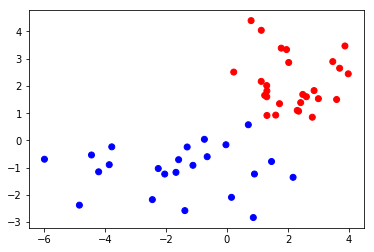

In [6]:
# plot the training set
plt.scatter(X_train[:,0],X_train[:,1],c=y_train,cmap=cm_bright)

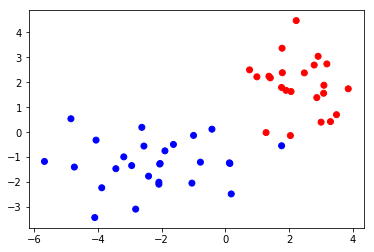

In [7]:
# plot the testing set
plt.scatter(X_test[:,0],X_test[:,1],c=y_test,cmap=cm_bright)

In [8]:
def plot_decision_2d(clf,X,y,title="Decision Regions"):
    '''
    plot_decision_2d(clf,X,y)
    Plots a 2D decision region.
    '''
    # create a mesh to plot in
    x_min, x_max = X[:,0].min() - 1, X[:,0].max() + 1
    y_min, y_max = X[:,1].min() - 1, X[:,1].max() + 1

    h = (x_max-x_min)/1000.0 # step size in the mesh
    
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    
    # Put the result into a color plot
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(5,5))
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.3)
    
    # Plot also the training points
    plt.scatter(X[:,0], X[:,1], c=y, alpha=0.5, edgecolors='none')
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.xticks([])#np.arange(x_min, x_max,1))
    plt.yticks([])#np.arange(y_min, y_max,1))
    plt.title(title)
    plt.grid(alpha=0.2)
    plt.show()

# Perceptron

In [9]:
# From Raschka - Python Machine Learning, 1st ed.
# requires numpy

class Perceptron(object):
    """Perceptron classifier."""
    def __init__(self, eta=False, n_iter=10):
        self.eta = eta
        self.n_iter = n_iter
        self.start = False

    def fit(self, X, y, plot=False):
        """Fit training data."""
        if self.start == False:
            self.w_ = np.zeros(1 + X.shape[1])
            self.errors_ = []
            self.start = True
        
        counter = 0
        for epoch in range(self.n_iter):
            errors = 0
            if plot == True:
                print "Epoch", epoch
            for xi, target in zip(X, y):
                counter = counter + 1
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
                # adds in a visualization
                if plot == True:
                    if update != 0.0:
                        plot_decision_2d(self,X_train,y_train,title="Iteration "+str(counter))
            self.errors_.append(errors)
        return self

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.net_input(X) >= 0.0, 1, -1)

In [11]:
ppn = Perceptron(eta=0.1, n_iter=25)

Epoch 0


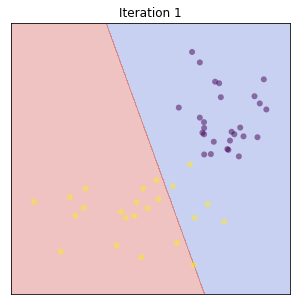

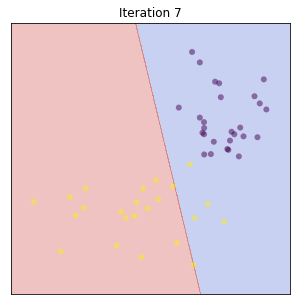

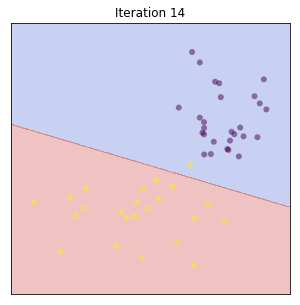

Epoch 1


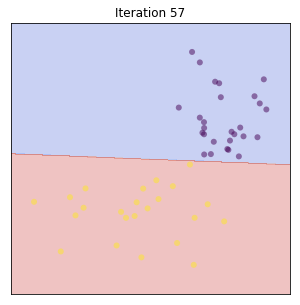

Epoch 2
Epoch 3
Epoch 4
Epoch 5
Epoch 6
Epoch 7
Epoch 8
Epoch 9
Epoch 10
Epoch 11
Epoch 12
Epoch 13
Epoch 14
Epoch 15
Epoch 16
Epoch 17
Epoch 18
Epoch 19
Epoch 20
Epoch 21
Epoch 22
Epoch 23
Epoch 24


In [12]:
ppn.fit(X_train, y_train, plot=True)

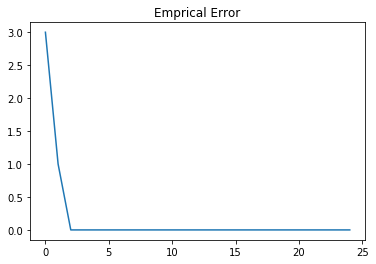

In [13]:
plt.title("Emprical Error")
plt.plot(ppn.errors_)

## Decision Boundary, Training Set

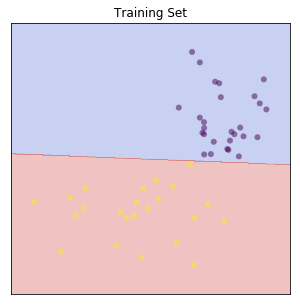

Empirical error on the training set:  0


In [14]:
plot_decision_2d(ppn,X_train,y_train,title="Training Set")
print "Empirical error on the training set: ",(ppn.predict(X_train) != y_train).sum()

## Decision Boundary, Testing Set

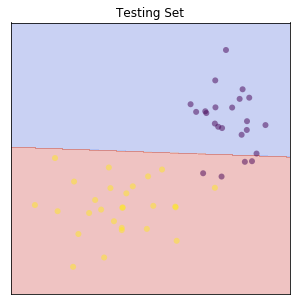

Empirical error on the testing set:   4


In [15]:
plot_decision_2d(ppn,X_test,y_test,title="Testing Set")
print "Empirical error on the testing set:  ",(ppn.predict(X_test)  != y_test).sum()

## Adaline (with Gradient Descent)

In [16]:
class AdalineGD(object):
    """ADAptive LInear NEuron classifier.

    Parameters
    ------------
    eta : float
        Learning rate (between 0.0 and 1.0)
    n_iter : int
        Passes over the training dataset.

    Attributes
    -----------
    w_ : 1d-array
        Weights after fitting.
    errors_ : list
        Number of misclassifications in every epoch.

    """
    def __init__(self, eta=0.01, n_iter=50):
        self.eta = eta
        self.n_iter = n_iter

    def fit(self, X, y, plot=False):
        """ Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_samples, n_features]
            Training vectors, where n_samples is the number of samples and
            n_features is the number of features.
        y : array-like, shape = [n_samples]
            Target values.

        Returns
        -------
        self : object

        """
        self.w_ = np.zeros(1 + X.shape[1])
        self.cost_ = []
        for i in range(self.n_iter):
            output = self.net_input(X)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (errors**2).sum() / 2.0
            self.cost_.append(cost)
            # adds in a visualization
            if plot == True:
                plot_decision_2d(agd,X_train,y_train,title="Iteration "+str(i))
        return self

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def activation(self, X):
        """Compute linear activation"""
        return self.net_input(X)

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.activation(X) >= 0.0, 1, -1)

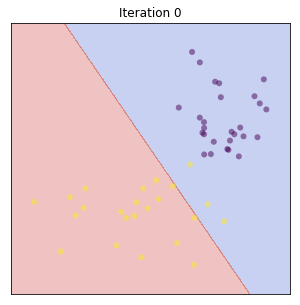

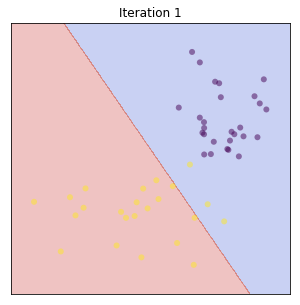

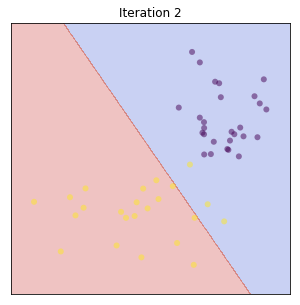

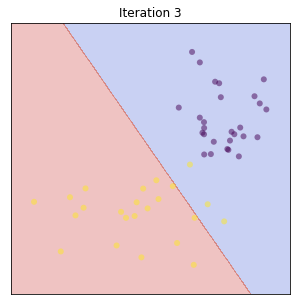

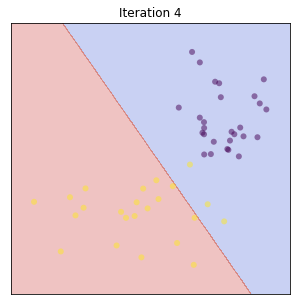

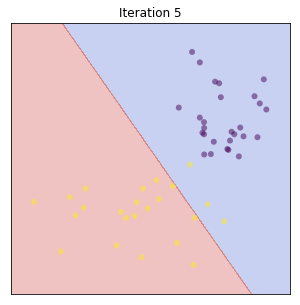

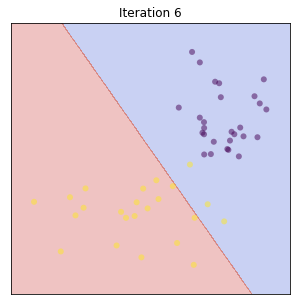

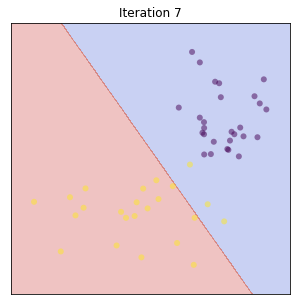

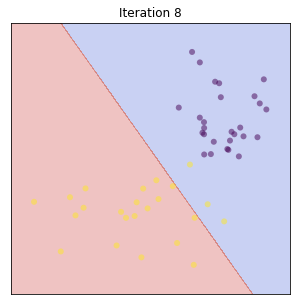

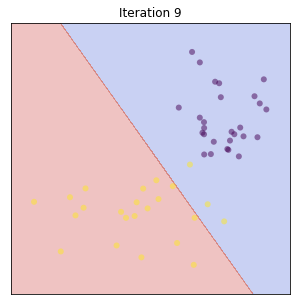

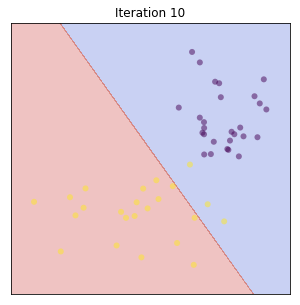

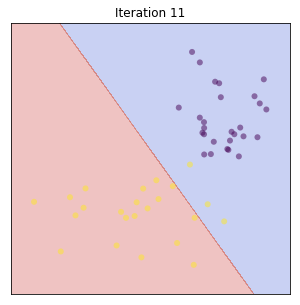

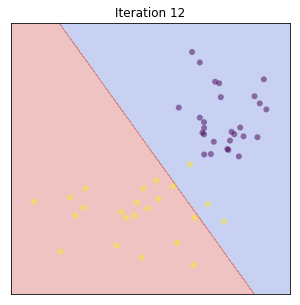

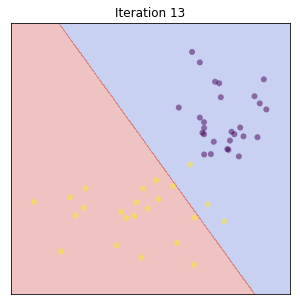

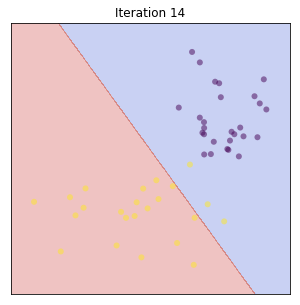

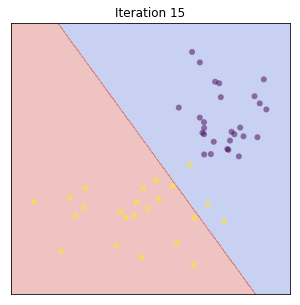

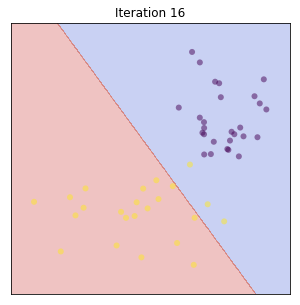

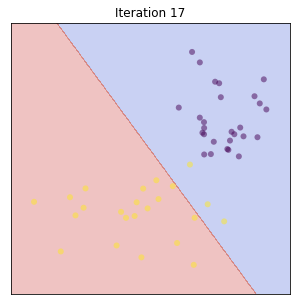

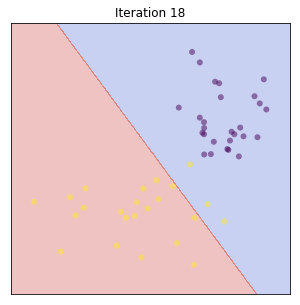

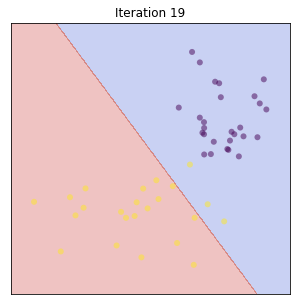

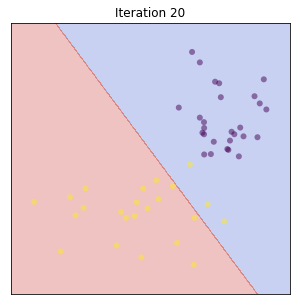

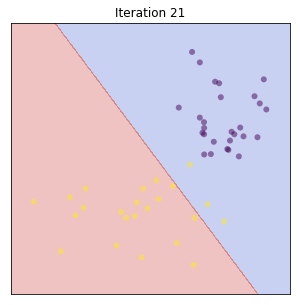

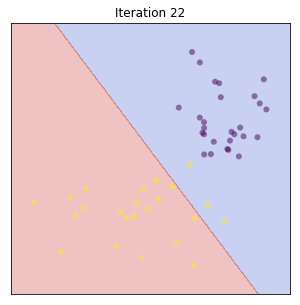

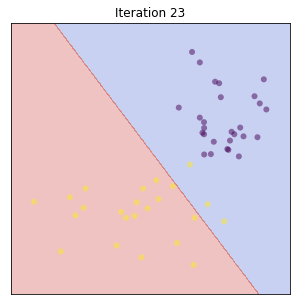

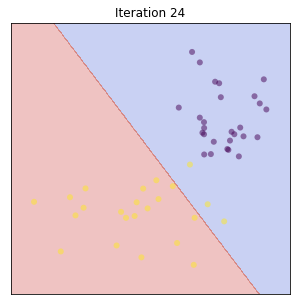

In [19]:
agd = AdalineGD(eta=0.0001, n_iter=25)
agd.fit(X_train, y_train, plot=True)

Text(0,0.5,'Sum-squared-error')

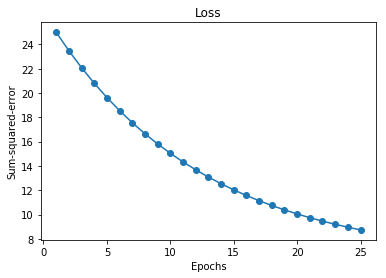

In [20]:
plt.title("Loss")
plt.plot(range(1, len(agd.cost_) + 1), agd.cost_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Sum-squared-error')

Empirical error on the training set:  3


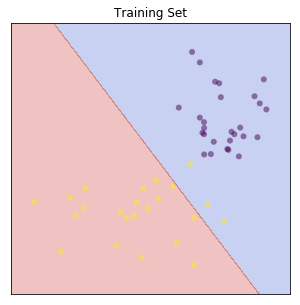

In [21]:
print "Empirical error on the training set: ",(agd.predict(X_train) != y_train).sum()
plot_decision_2d(agd,X_train,y_train,title="Training Set")

Empirical error on the testing set:  1


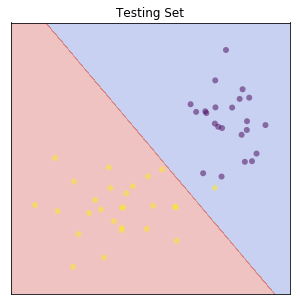

In [22]:
print "Empirical error on the testing set: ",(agd.predict(X_test) != y_test).sum()
plot_decision_2d(agd,X_test,y_test,title="Testing Set")

## Adaline (with SGD)

In [27]:
from numpy.random import seed

class AdalineSGD(object):
    """ADAptive LInear NEuron classifier.

    Parameters
    ------------
    eta : float
        Learning rate (between 0.0 and 1.0)
    n_iter : int
        Passes over the training dataset.

    Attributes
    -----------
    w_ : 1d-array
        Weights after fitting.
    errors_ : list
        Number of misclassifications in every epoch.
    shuffle : bool (default: True)
        Shuffles training data every epoch if True to prevent cycles.
    random_state : int (default: None)
        Set random state for shuffling and initializing the weights.
        
    """
    def __init__(self, eta=0.01, n_iter=10, shuffle=True, random_state=None):
        self.eta = eta
        self.n_iter = n_iter
        self.w_initialized = False
        self.shuffle = shuffle
        if random_state:
            seed(random_state)
        
    def fit(self, X, y, plot=False):
        """ Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_samples, n_features]
            Training vectors, where n_samples is the number of samples and
            n_features is the number of features.
        y : array-like, shape = [n_samples]
            Target values.

        Returns
        -------
        self : object

        """
        self._initialize_weights(X.shape[1])
        self.cost_ = []
        for i in range(self.n_iter):
            if self.shuffle:
                X, y = self._shuffle(X, y)
            cost = []
            for xi, target in zip(X, y):
                cost.append(self._update_weights(xi, target))
            avg_cost = sum(cost) / len(y)
            self.cost_.append(avg_cost)
            if plot == True:
                # bad coding practice, but a quick fix.
                plot_decision_2d(asgd,X_train,y_train,title="Iteration "+str(i))
        return self

    def partial_fit(self, X, y):
        """Fit training data without reinitializing the weights"""
        if not self.w_initialized:
            self._initialize_weights(X.shape[1])
        if y.ravel().shape[0] > 1:
            for xi, target in zip(X, y):
                self._update_weights(xi, target)
        else:
            self._update_weights(X, y)
        return self

    def _shuffle(self, X, y):
        """Shuffle training data"""
        r = np.random.permutation(len(y))
        return X[r], y[r]
    
    def _initialize_weights(self, m):
        """Initialize weights to zeros"""
        self.w_ = np.zeros(1 + m)
        self.w_initialized = True
        
    def _update_weights(self, xi, target):
        """Apply Adaline learning rule to update the weights"""
        output = self.net_input(xi)
        error = (target - output)
        self.w_[1:] += self.eta * xi.dot(error)
        self.w_[0] += self.eta * error
        cost = 0.5 * error**2
        return cost
    
    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def activation(self, X):
        """Compute linear activation"""
        return self.net_input(X)

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.activation(X) >= 0.0, 1, -1)

In [28]:
asgd = AdalineSGD(eta=0.0001, n_iter=25)

In [29]:
%%time
asgd.fit(X_train, y_train, plot=False)

Wall time: 13 ms


Text(0,0.5,'Sum-squared-error')

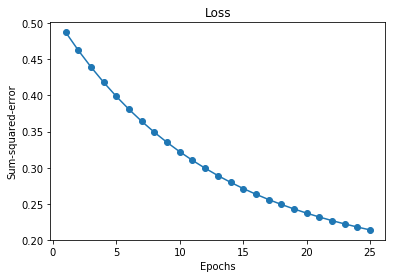

In [23]:
plt.title("Loss")
plt.plot(range(1, len(asgd.cost_) + 1), asgd.cost_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Sum-squared-error')

Empirical error on the training set:  3


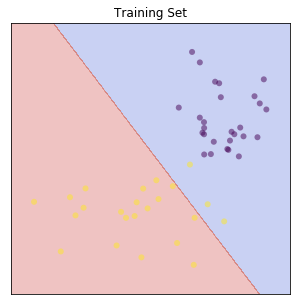

In [30]:
print "Empirical error on the training set: ",(asgd.predict(X_train) != y_train).sum()
plot_decision_2d(asgd,X_train,y_train,title="Training Set")

Empirical error on the training set:  1


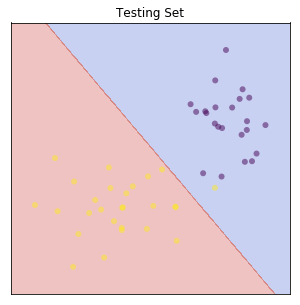

In [31]:
print "Empirical error on the training set: ",(asgd.predict(X_test) != y_test).sum()
plot_decision_2d(asgd,X_test,y_test,title="Testing Set")